# Recommendation System

supported by.
https://www.kaggle.com/abdelrahmanzied/netflix-movies-recommendation-system

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
# import plotly.express as px

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

from sklearn.feature_extraction.text import TfidfVectorizer
# import spacy
# from spacy.lang.en.stop_words import STOP_WORDS
# nlp = spacy.load('en_core_web_sm')
import difflib
from sklearn.metrics.pairwise import cosine_similarity
sns.set()
warnings.filterwarnings("ignore")

In [4]:
movies = pd.read_csv('./film_festival_ver3.csv')
movies.head(-5)

,year,film_festival,title,director,field,award,genre,plot,rating,runtime,prodYear,actors,img_link,stills
0,2021,소리아 국제단편영화제,조지아,제이 박,NaN,NaN,"가족,범죄",병들고 가난한 부부가 딸의 억울한 죽음을 규명하기 위해 나선다. 가해자를 밝히지도 ...,12세관람가,29.0,2020.0,"이양희,이채경,김규남",https://ssl.pstatic.net/imgmovie/mdi/mit110/19...,http://file.koreafilm.or.kr/thm/01/copy/00/55/...
1,2021,보고타 단편영화제,미미(美味): 궁극의 식사,한재원,경쟁부문,NaN,"코메디,공포",미각을 잃은 미식 유튜버 성호는 어딘가 기괴한 음식점에 방문한다.,NaN,19.0,2020.0,"김최용준,정경임,이종윤",https://ssl.pstatic.net/imgmovie/mdi/mit110/20...,http://file.koreafilm.or.kr/thm/01/copy/00/59/...
2,2021,엑상프로방스 국제단편영화제,아이즈앤혼즈,임채린,International Competition of Experimental Shorts,NaN,기타,NaN,NaN,NaN,NaN,NaN,https://ssl.pstatic.net/imgmovie/mdi/mit110/20...,NaN
3,2021,서울독립영화제,절해고도,김미영,페스티벌 초이스,NaN,드라마,절해고도. '육지에서 멀리 떨어진 바다의 외딴 섬'이라는 뜻을 지닌 제목은 삶의 표...,NaN,116.0,2021.0,"박종환,이연,강경헌",https://ssl.pstatic.net/imgmovie/mdi/mit110/20...,http://file.koreafilm.or.kr/thm/01/copy/00/59/...
4,2021,서울독립영화제,장갑을 사러,이현주,단편경쟁,NaN,멜로/로맨스,피아노를 가르치는 인경은 연인의 일본 발령 소식에 일본어 학원을 다니기 시작한다. ...,NaN,29.0,2021.0,"김정민,양종욱,김하람",https://ssl.pstatic.net/imgmovie/mdi/mit110/20...,http://file.koreafilm.or.kr/thm/01/copy/00/59/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3352,2000,정동진독립영화제,심청,유종미,단편과 애니 2,NaN,드라마,"딸을 극단적으로 사랑하는 눈먼 아버지, 무당이었던 어머니가 그리운 눈먼 아버지의 딸...",NaN,30.0,2000.0,"백은경,유순철,이동현",https://ssl.pstatic.net/imgmovie/mdi/mit110/02...,http://file.koreafilm.or.kr/thm/01/copy/00/31/...
3353,2000,정동진독립영화제,1979년 10월 28일 일요일 맑음,권종관,재밌는 단편모음 2,NaN,드라마,"1979년 10월 28일 일요일, 영환의 부모님은 아침 일찍 시골에 내려가신다. 엄...",NaN,17.0,1999.0,"강혜은,박진아,이동근",https://ssl.pstatic.net/imgmovie/mdi/mit110/03...,http://file.koreafilm.or.kr/thm/01/copy/00/36/...
3354,2000,정동진독립영화제,81 해적 디스코 왕이 되다,김동원,단편과 애니 2,NaN,기타,NaN,NaN,NaN,NaN,NaN,https://ssl.pstatic.net/imgmovie/mdi/mit110/03...,NaN
3355,2000,정동진독립영화제,미메시스 TV - 에피소드 1,전승일,단편과 애니 2,NaN,드라마,사람이 컴퓨터 앞에 앉아 있다. 밖에는 디스켓이 날아다니고 그는 무료함을 느낀다. ...,NaN,3.0,2000.0,NaN,https://ssl.pstatic.net/imgmovie/mdi/mit110/04...,http://file.koreafilm.or.kr/thm/01/copy/00/31/...


## DATA columns

In [5]:
movies.columns

Index(['year', 'film_festival', 'title', 'director', 'field', 'award', 'genre',
       'plot', 'rating', 'runtime', 'prodYear', 'actors', 'img_link',
       'stills'],
      dtype='object')

In [6]:
movies.count()

year             3362
film_festival    3362
title            3362
director         3362
field            3164
award             381
genre            3362
plot             3055
rating            627
runtime          3029
prodYear         3077
actors           2278
img_link         2763
stills           2513
dtype: int64

In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3362 entries, 0 to 3361
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           3362 non-null   int64  
 1   film_festival  3362 non-null   object 
 2   title          3362 non-null   object 
 3   director       3362 non-null   object 
 4   field          3164 non-null   object 
 5   award          381 non-null    object 
 6   genre          3362 non-null   object 
 7   plot           3055 non-null   object 
 8   rating         627 non-null    object 
 9   runtime        3029 non-null   float64
 10  prodYear       3077 non-null   float64
 11  actors         2278 non-null   object 
 12  img_link       2763 non-null   object 
 13  stills         2513 non-null   object 
dtypes: float64(2), int64(1), object(11)
memory usage: 367.8+ KB


## CONTENTS

In [8]:
movies['genre'].unique()

array(['가족,범죄', '코메디,공포', '기타', '드라마', '멜로/로맨스', '드라마,멜로/로맨스', '사회,지역',
       '드라마,가족,아동', '드라마,인물', '드라마,사회물(경향)', '드라마,뮤직', '코메디,문화,사회',
       '사회,인물', '코메디', '실험', '사회', '코메디,멜로/로맨스', '드라마,스포츠', '사회,가족', 'SF',
       '문화', '사회,인권', '드라마,어드벤처,판타지,가족,아동', '인물,가족,뮤직', '멜로/로맨스,드라마,청춘영화',
       '인물', '공포,판타지,스릴러', '역사', '드라마,시대극/사극', '드라마,판타지', '드라마,가족',
       '인물,가족', '멜로/로맨스,드라마', '드라마,동성애', '지역,자연ㆍ환경', '역사,사회', '지역,역사',
       '뮤직,드라마', '드라마,코메디,가족', '뮤직', '공포', '미스터리,스릴러', '지역,자연ㆍ환경,인물',
       '스릴러', '문화,기업ㆍ기관ㆍ단체', '멜로드라마', '드라마,스릴러', '드라마,하이틴(고교)', '가족,드라마',
       'SF,판타지,공포', '드라마,멜로/로맨스,로드무비', 'SF,실험', '인물,사회', '가족,아동,드라마',
       '인물,사회,역사', '자연ㆍ환경', '기업ㆍ기관ㆍ단체,지역', '공포,판타지', '드라마,반공/분단',
       '드라마,멜로/로맨스,가족,코메디', '드라마,액션', '판타지', '드라마,미스터리,공포', '스릴러,스포츠',
       '드라마,공포', '가족,하이틴(고교)', '드라마,청춘영화,하이틴(고교),인물', '공포,스릴러,미스터리',
       '드라마,코메디,공포', '코메디,가족,판타지', '코메디,드라마', '드라마,코메디', '지역,사회',
       '드라마,사회물(경향),인권', '코메디,액션', '사회물(경향),인물,인권', '인권', 'SF,가족,재난',
       '가족,지역,사

## 장르 genre DATA => (NEW) DATAset

## heat map

## Yearly Content (Updated || Produced)
year => 2021 - 2000 (22개 그룹)
prodYear => 2021 - 1999 yr

Q. 내림차순이 낫나요? (<) 연도별 순서대로가 낫나요?
뭔가 제 눈에는 너무 난잡해 보이네요.

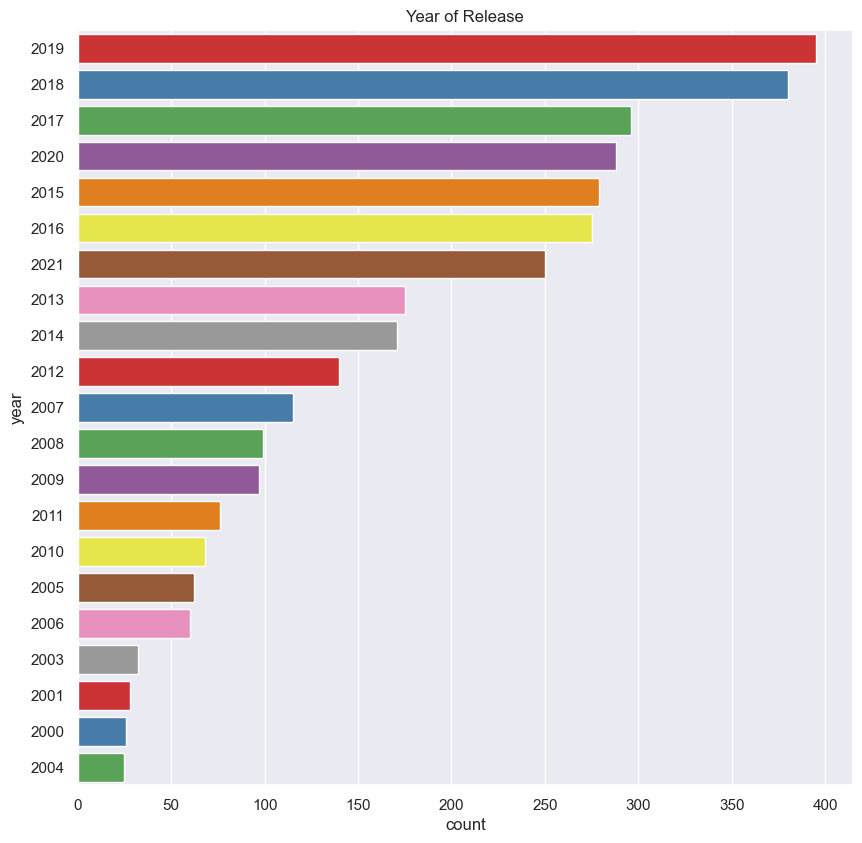

In [22]:
plt.figure(figsize=(10, 10), dpi=100)
sns.countplot(y="year", data=movies,  palette="Set1", order=movies['year'].value_counts().index[0:21])
plt.title('Year of Release')
plt.show()

[] Release(출품) - 제작 년도가 일치하지 않는 경우 꽤 있음.

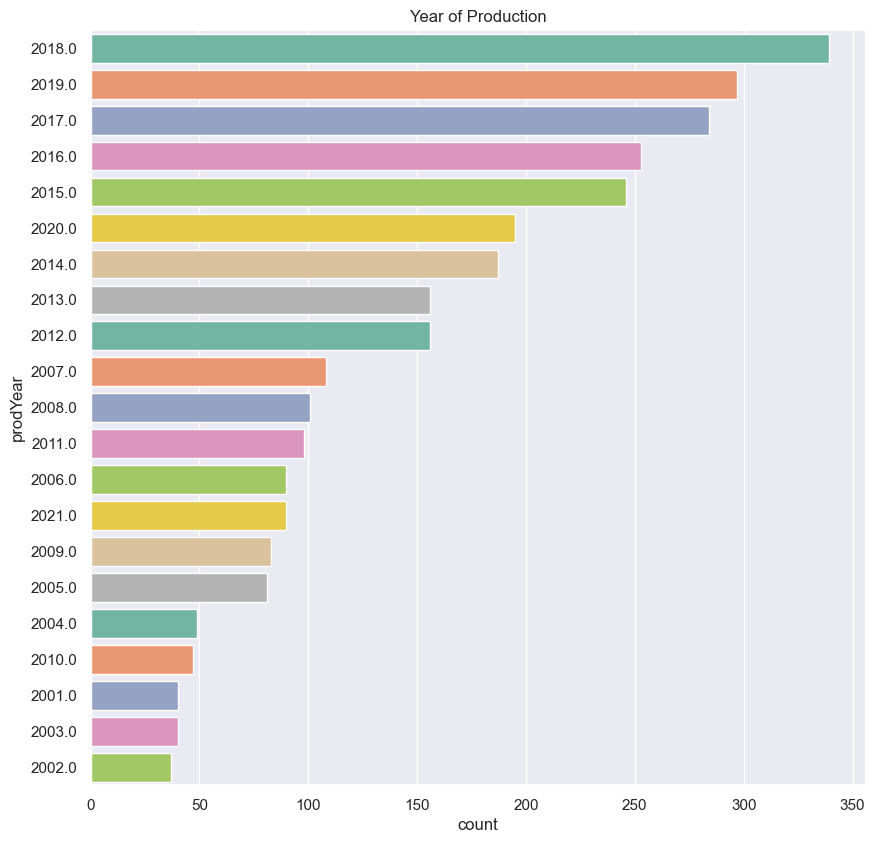

In [23]:
plt.figure(figsize=(10, 10), dpi=100)
sns.countplot(y="prodYear", data=movies, palette="Set2", order=movies['prodYear'].value_counts().index[0:21])
plt.title('Year of Production')
plt.show()

## Exclusive Content
(Added Year >= Release Year)

In [27]:
ls = []
for i in range(movies.shape[0]):
    try:
        if int(movies.iloc[i]['prodYear']) >= movies.iloc[i]['year']:
            ls.append('Exclusive')
        else:
            ls.append('Not Exclusive')
    except:
        ls.append('Not Exclusive')
movies['Exclusive'] = ls
del ls

[] 그냥 편차 그래프로 그리는 게 나을 듯 합니다.

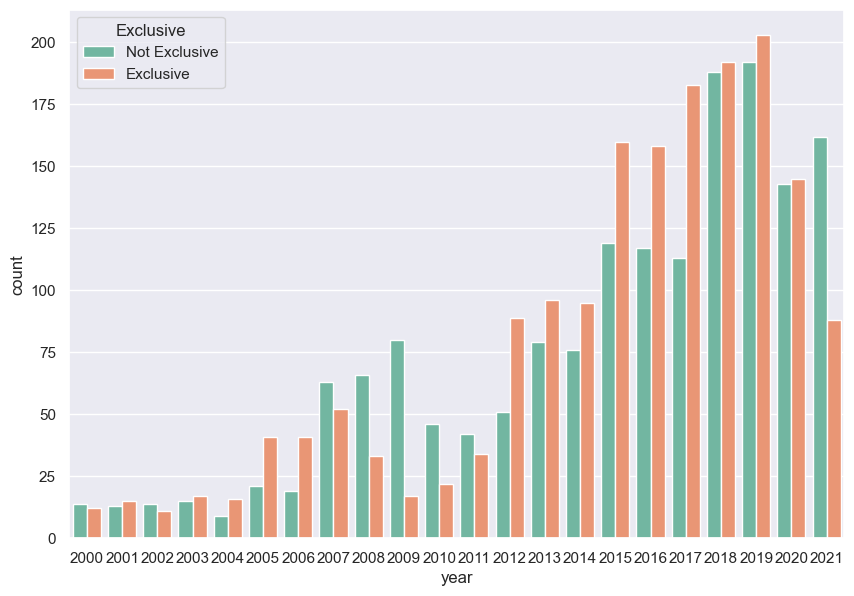

In [29]:
plt.figure(figsize=(10, 7), dpi=100)
sns.countplot(x=movies['year'].sort_values(), hue='Exclusive', data=movies, palette="Set2")
plt.show()

## genre
split

In [37]:
genres = set()
for i in list(movies['genre'].unique()):
    ls = i.split(',')
    genres.update(ls)
len(genres)

45

In [38]:
genres

{'SF',
 '가족',
 '계몽',
 '공포',
 '공포(호러)',
 '과학',
 '교육',
 '기업ㆍ기관ㆍ단체',
 '기타',
 '동성애',
 '드라마',
 '로드무비',
 '멜로/로맨스',
 '멜로드라마',
 '무협',
 '문예',
 '문화',
 '뮤지컬',
 '뮤직',
 '미스터리',
 '반공/분단',
 '범죄',
 '사회',
 '사회물(경향)',
 '스릴러',
 '스포츠',
 '시대극/사극',
 '실험',
 '아동',
 '액션',
 '어드벤처',
 '역사',
 '인권',
 '인물',
 '자연ㆍ환경',
 '재난',
 '전쟁',
 '종교',
 '지역',
 '첩보',
 '청춘영화',
 '코메디',
 '판타지',
 '하이틴(고교)',
 '활극'}

In [34]:
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/nanumsquarel.ttf").get_name()
rc('font', family=font_name)

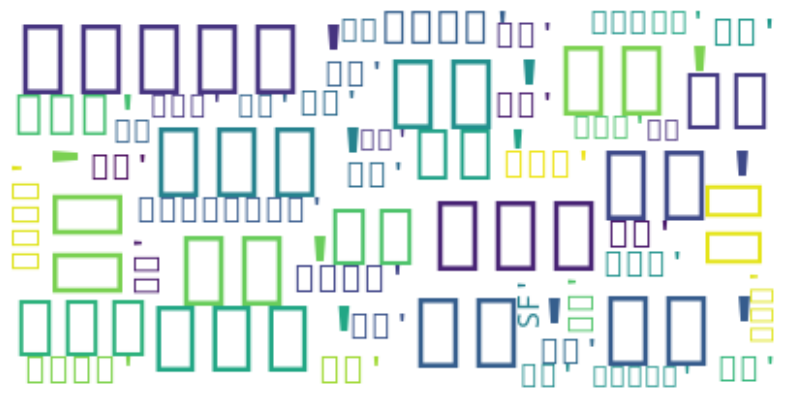

In [39]:
text = list(genres)
plt.rcParams['figure.figsize'] = (13, 13)
wordcloud = WordCloud(background_color="white", max_font_size=50).generate(str(text))

plt.figure(figsize=(10, 7), dpi=100)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## DATA preprocessing

In [40]:
movies.fillna('', inplace=True)

In [41]:
print(movies.shape)
movies.drop_duplicates(['title'], inplace=True) # 되돌리기...
print(movies.shape)

(3362, 15)
(2777, 15)


In [43]:
X = movies['title'] + " " + movies['plot']
X

0       조지아 병들고 가난한 부부가 딸의 억울한 죽음을 규명하기 위해 나선다. 가해자를 밝...
1       미미(美味): 궁극의 식사 미각을 잃은 미식 유튜버 성호는 어딘가 기괴한 음식점에 ...
2                                                 아이즈앤혼즈 
3       절해고도 절해고도. '육지에서 멀리 떨어진 바다의 외딴 섬'이라는 뜻을 지닌 제목은...
4       장갑을 사러 피아노를 가르치는 인경은 연인의 일본 발령 소식에 일본어 학원을 다니기...
                              ...                        
3355    미메시스 TV - 에피소드 1 사람이 컴퓨터 앞에 앉아 있다. 밖에는 디스켓이 날아...
3357    엔조이 유어 썸머 어느 무더운 여름, 아직 회사 생활에 적응하지 못한 한 남자에게 ...
3358    너무 많이 본 사나이 승수는 앞집에 세들어 사는 여자를 몰래 카메라에 담기 위해 친...
3359    아리랑 아리랑 음악에 맞추어 한국 전통 문양들이 생성되고 소멸된다. 연출의도_ 관성...
3361    초촌면 신암리 삭막해진 농촌에서 유기농사를 짓는 주인공은 고집스러움 때문에 마을 사...
Length: 2777, dtype: object

## Vectorizer *****

In [46]:
Vectorizer = TfidfVectorizer() #??